In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Stage 1 - Understanding the Data

## 1.1. Import Dataset

In [2]:
df = pd.read_csv('BankChurners.csv')

As the dataset owner suggested, we should drop the last two columns before doing anything else

In [3]:
# slice the DataFrame, excluding 2 last columns, and reassign to 'df'
df = df.iloc[:,:-2]

## 1.2. Preview Dataset

In [4]:
# set option to show all columns without truncation
pd.set_option('max_columns', None)

# Preview the top 10 rows
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [5]:
# find rows and columns count
df.shape

(10127, 21)

In [6]:
# see dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
#find unique values for each columns
for col in df:
    uniq = df[col].value_counts()
    print(uniq, '\n==============\n')

709920258    1
717171408    1
709372608    1
796336833    1
721433283    1
            ..
720250158    1
709831983    1
720917808    1
719207733    1
708085458    1
Name: CLIENTNUM, Length: 10127, dtype: int64 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64 

F    5358
M    4769
Name: Gender, dtype: int64 

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64 

Graduate         3128
High School      2013
Unknown          1519
U

## 1.3. Dataset Features Description
|No. | Column Name | Description | Data Type | Feature Type | Non-Null Value | Unique Values|
|---|---|---|---|---|---|---|
|1| CLIENTNUM | Client number. Unique identifier for the customer holding the account | int | Nominal | 10127 | *(10127 unique ID)*|
|2| Attrition_Flag | Internal event (customer activity) variable - if the account is closed then 1 else 0 | str | Nominal | 10127 | Existing Customer, Attrited Customer |
|3| Customer_Age | Demographic variable - Customer's Age in Years | int | Ratio | 10127 | *varied numerical* |
|4| Gender | Demographic variable - M=Male, F=Female | str | Nominal | 10127 | M, F |
|5| Dependent_count | Demographic variable - Number of dependents | int | Ratio | 10127 | 0, 1, 2, 3, 4, 5 | 
|6| Education_Level | Demographic variable - Educational Qualification of the account holder | str | Ordinal | 10127 | Unknown, Uneducated, High School, College, Graduate, Post-Graduate, Doctorate |
|7| Marital_Status | Demographic variable - Marital Status of the account holder | str | Nominal | 10127 | Unknown, Single, Married, Divorced |
|8| Income_Category | Demographic variable - Annual Income Category of the account holder | str | Ordinal | 10127 | Unknown, Less than $40 K, $40K – $60K, $60K – $80K, $80K – $120K, $120K +|
|9| Card_Category | Product Variable - Type of Card | str | Ordinal | 10127 | Blue, Silver, Gold, Platinum |
|10| Months_on_book | Period of relationship with bank | int | Ratio | 10127 | *varied numerical* |
|11| Total_Relationship_Count | Total no. of products held by the customer | int | Ratio | 10127 | 0, 1, 2, 3, 4, 5, 6 |
|12| Months_Inactive_12_mon | No. of months inactive in the last 12 months | int | Ratio | 10127 | 0, 1, 2, 3, 4, 5, 6 |
|13| Contacts_Count_12_mon | No. of Contacts in the last 12 months | int | Ratio | 10127 | 0, 1, 2, 3, 4, 5, 6 |
|14| Credit_Limit | Credit Limit on the Credit Card | float | Ratio | 10127 | *varied numerical* |
|15| Total_Revolving_Bal | Total Revolving Balance on the Credit Card | int | Ratio | 10127 | *varied numerical* |
|16| Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months) | float | Ratio | 10127 | *varied numerical* |
|17| Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) | float | Ratio | 10127 | *varied numerical* |
|18| Total_Trans_amt | Total Transaction Amount (Last 12 months) | int | Ratio | 10127 | *varied numerical* |
|19| Total_Trans_Ct | Total Transaction Count (Last 12 months) | int | Ratio | 10127 | *varied numerical* |
|20| Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) | float | Ratio | 10127 | *varied numerical* |
|21| Avg_Utilization_Ratio | Average Card Utilization Ratio | float | Ratio | 10127 | *varied numerical* |

# Stage 2 - Identifying Activities
Based on our initial Data Understanding stage, we can identify some activities that needs to be done on the dataset:
1. **Remove Unnecessary Features**: the dataset might have some features that are unnecessary for our modelling, that is features that cannot be used as predictor. Remove them before doing EDA
2. **Handle Missing Value**: make sure that the dataset doesn't have any missing value
3. **Exploratory Data Analysis**: explore the features statistically, and use visualization to get a better view of the data
4. **Handle Categorical Data**: categorical data needs to be encoded before modelling
5. **Handle Numerical Data**: scale the numerical data with Standardization or Normalization

# Stage 3 - EDA & Visualization

## 3.1. Unnecessary Feature Removal
Before processing further, we need to remove features that cannot be used on modelling.
The *CLIENTNUM* feature contains unique ID for every customer so it can not be used as Predictor (input) for the Target (output), and should be dropped

In [8]:
# slice the DataFrame, excluding CLIENTNUM column at index 0, and reassign to 'df'
df = df.iloc[:,1:]

# see the updated df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Now that we have all relevant features, each with their correct data type, let's define which features are numerical and categorical and assign each to a variable.

In [9]:
#define categorical columns
cat_cols = list(df.select_dtypes('object'))
cat_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [10]:
#define numerical columns
num_cols = list(df.select_dtypes(['int64','float64']))
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

## 3.2. Missing Value Check
Make Sure that the data has no missing value

In [11]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**Conclusion:** there is no missing value found on the dataset

## 3.3. Target Feature Exploration

The Target Feature (output) that we want to predict is *Attrition_Flag*, which has two unique values, that is 'Existing Customer' and 'Attrited Customer'. Before doing the exploration, encode those values into 0 and 1.

In [12]:
# Encode Attrition_Flag
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 
                                                 'Attrited Customer':1})

We will use visualization in exploring the features of the dataset, so we need to import the required libraries

In [13]:
# import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette('pastel')

### 3.3.1. Target Feature Distribution

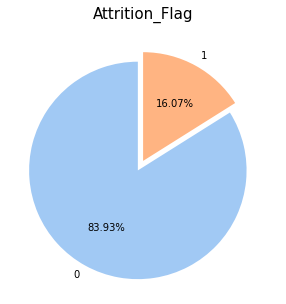

In [14]:
# Prepare the data 
attr_count = df['Attrition_Flag'].value_counts()
attr_label = df['Attrition_Flag'].value_counts().index

# Plot
fig,ax = plt.subplots(figsize=(7,5))
# pie plot
ax.pie(attr_count, explode=(0.1,0), labels=attr_label, autopct='%.2f%%', startangle=90)
ax.set_title('Attrition_Flag', fontsize=15)
# show plot
plt.show()

Here we can see that we have 16.07% of customers that attrited/churned, or 1627 out of 10127.

## 3.4. Predictor Features Exploration
Now, let's have a look at the other features, that will be used as predictors for our models.

### 3.4.1. Numerical Predictor Features
First, define the numerical predictors, which are all the numerical features we defined earlier. Assign it to a variable, as it will be used later for slicing the dataframe.

In [15]:
# define numerical predictors
num_pred = num_cols
num_pred

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

#### 3.4.1.1. Descriptive Statistics

In [16]:
# describe the statistics of numerical predictors
num_stat = df[num_pred].describe().transpose().reset_index()
num_stat.rename(columns={'index': 'feature'}, inplace=True)
num_stat

,feature,count,mean,std,min,25%,50%,75%,max
0,Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
1,Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
2,Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
3,Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
4,Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
5,Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
6,Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
7,Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
8,Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
9,Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


#### 3.4.1.2. Distribution

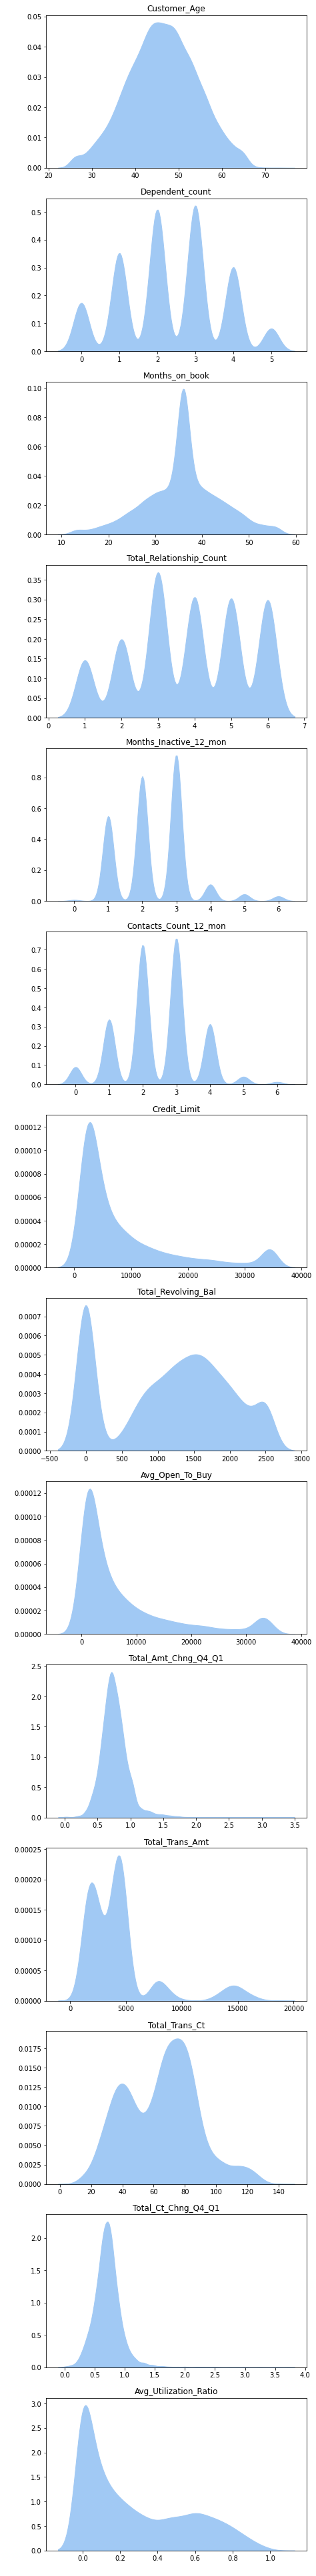

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(7,70))  #each axes size=7x5

i=0

for col in num_pred:
    sns.kdeplot(x=df[col], fill=True, alpha=1, ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col, fontsize=12)
   # ax[i].text(0.05, 0.005, 'test')  # how to add skewness text to plot?
    i=i+1
    
plt.show()

In [21]:
# check skewness of distribution
skew = []
for col in num_pred:
    skew.append(round(df[col].skew(),3))

num_dist = pd.DataFrame({'feature':num_pred, 'skewness':skew})
num_dist

,feature,skewness
0,Customer_Age,-0.034
1,Dependent_count,-0.021
2,Months_on_book,-0.107
3,Total_Relationship_Count,-0.162
4,Months_Inactive_12_mon,0.633
5,Contacts_Count_12_mon,0.011
6,Credit_Limit,1.667
7,Total_Revolving_Bal,-0.149
8,Avg_Open_To_Buy,1.662
9,Total_Amt_Chng_Q4_Q1,1.732


Features that have skewness between -0.05 and 0.05 are assumed to have gaussian distribution, which are:

In [22]:
gauss_feat = list(num_dist.query('skewness < 0.05 & skewness > -0.05')['feature'])
gauss_feat

['Customer_Age', 'Dependent_count', 'Contacts_Count_12_mon']

### 3.4.1.3. Numerical Correlation

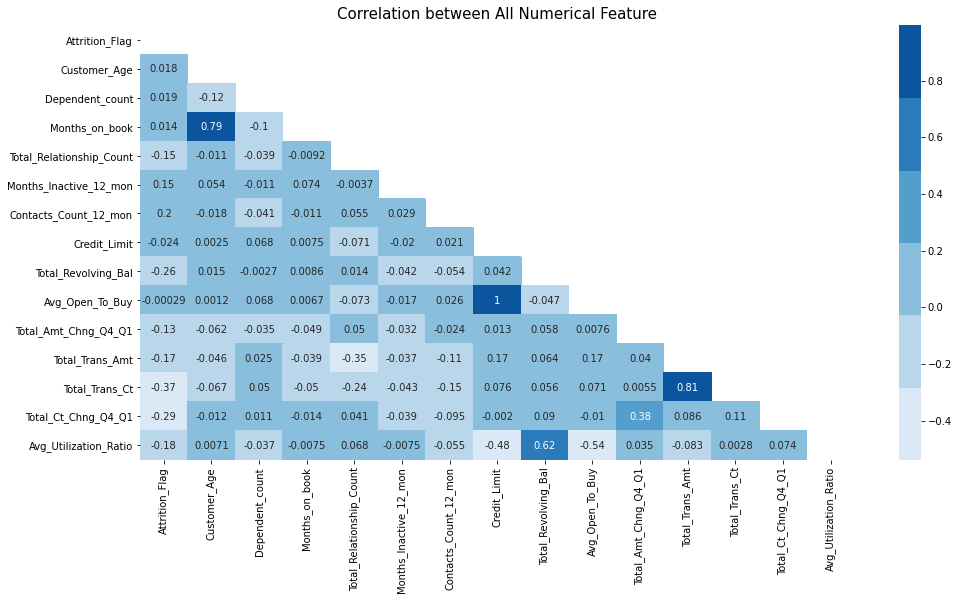

In [23]:
# prepare figure
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Feature', size=15)

# create mask
mask = np.triu(np.ones_like(df.corr()))
# create colormap
colormap = sns.color_palette("Blues")
# plot heatmap
sns.heatmap(df.corr(), annot=True, cmap=colormap, mask=mask)
# sns.heatmap(df.corr(), annot=True, mask=mask)

plt.show()

Here we can see that some feature are highly correlated, such as:
* *Avg_Open_To_Buy* and *Credit_Limit*, (1)
* *Total_Trans_Ct* and *Total_Trans_Amt*, (0.81)
* *Months_on_book* and *Customer_Age*, (0.79)

In [112]:
# corr= df.corr()
# plt.figure(figsize=(16,8))
# # create colormap
# colormap = sns.color_palette("Blues")
# sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1,linewidths=0.75, cmap=colormap)
# plt.show()

#### 3.4.1.4. Numerical-Target Relationship

In [24]:
# initiate empty list
tg_num_corr = []

# loop to fill tg_num_corr with each columns vs Target correlation coefficient
for col in num_pred:
    tg_num_corr.append(df[col].corr(df['Attrition_Flag']))

# create as DataFrame
tg_num_df = pd.DataFrame({'Numerical_Predictors': num_pred,
                          'Correlation_w_Target': tg_num_corr })

# sort the DataFrame by the absolute value of their correlation coefficient, descending
tg_num_df = tg_num_df.sort_values(by='Correlation_w_Target', key=abs, ascending=False).reset_index(drop=True)

# call the DataFrame
tg_num_df

,Numerical_Predictors,Correlation_w_Target
0,Total_Trans_Ct,-0.371403
1,Total_Ct_Chng_Q4_Q1,-0.290054
2,Total_Revolving_Bal,-0.263053
3,Contacts_Count_12_mon,0.204491
4,Avg_Utilization_Ratio,-0.178410
5,Total_Trans_Amt,-0.168598
6,Months_Inactive_12_mon,0.152449
7,Total_Relationship_Count,-0.150005
8,Total_Amt_Chng_Q4_Q1,-0.131063
9,Credit_Limit,-0.023873


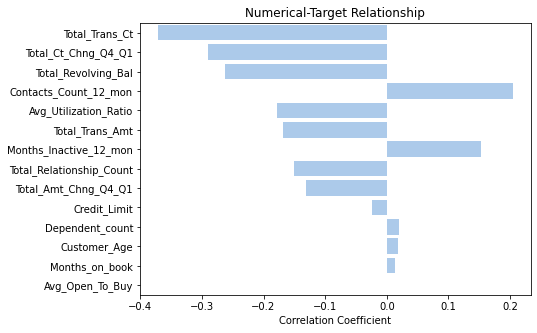

In [25]:
# display as figure
plt.figure(figsize=(7,5))
sns.barplot(x=tg_num_df['Correlation_w_Target'], y=tg_num_df['Numerical_Predictors'], color='#a2c9f4')
plt.ylabel('')
plt.xlabel('Correlation Coefficient')
plt.title('Numerical-Target Relationship', fontsize=12)
plt.show()

#### 3.4.1.5. Outlier Detection

##### **Box Plot**

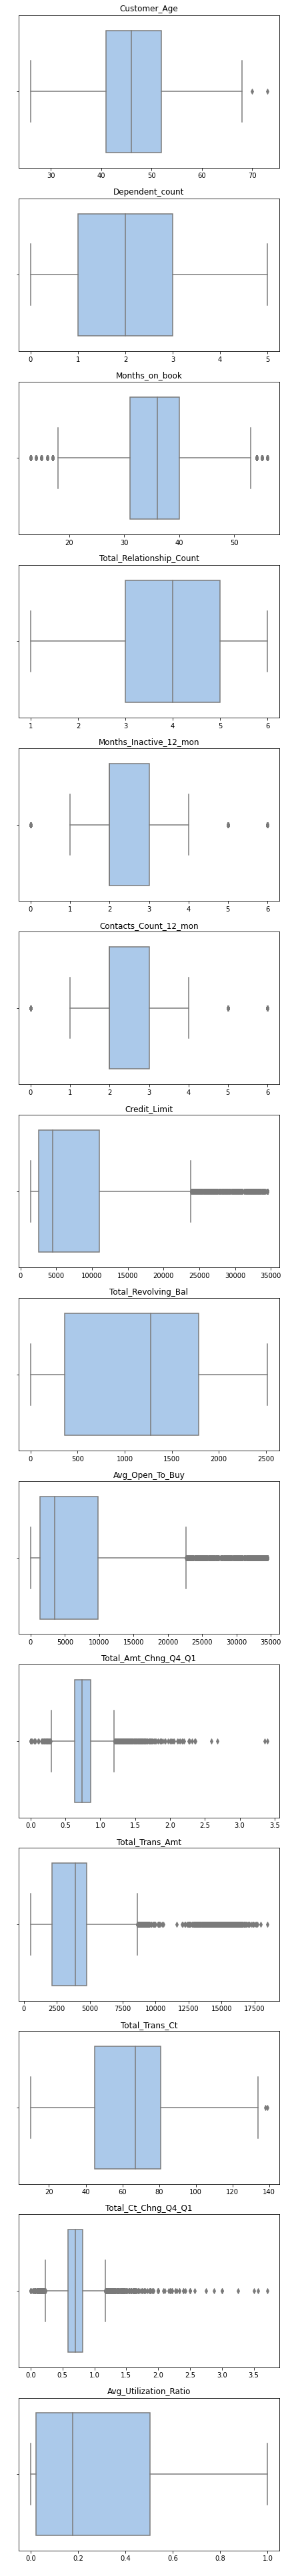

In [27]:
# set the figure
fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(7,70)) #each axes size=7x5
# initiate variable
i=0
# loop
for col in num_pred:
    sns.boxplot(data=df, x=col, ax=ax[i], palette='pastel')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col, fontsize=12)
    i=i+1
# show the plot
plt.show()

##### **Outliers Count**

Let's find out the outliers from our dataset. We will use two methods to find the outliers:
* Inner Fence, and
* Outer Fence

**1. Inner Fence**<br>
The lower boundary of this method is defined by *Q1 - (1.5 * IQR)*, and the upper boundary is defined by *Q1 + (1.5 * IQR)*

In [28]:
# outliers of each feature using Inner Fence

# initiate empty dictionary and list for the loop
outlier_dict_if = {}          #dict feature and all outliers
outlier_dict_unique_if = {}   #dict feature and unique outliers
# loop each features
for col in num_pred:
    # find upper and lower bound of each features using inner fence
    stats = df[col].describe()
    q1, q3 = stats['25%'], stats['75%']
    iqr = q3-q1
    lower_bound_if = q1 - (1.5 * iqr)
    upper_bound_if = q3 + (1.5 * iqr)
    
    # set a condition: add data that are outside upper-lower boundary to dict
    # initiate empty list
    outlier_list_if = []
    outlier_list_unique_if = []
    for x in df[col]:
        if ((x > upper_bound_if) or (x < lower_bound_if)):
            outlier_list_if.append(x)
            # if the value is not already in list
            if x not in outlier_list_unique_if:
                outlier_list_unique_if.append(x)
        # append the list to dictionaries
        outlier_dict_if['{}'.format(col)] = outlier_list_if
        outlier_dict_unique_if['{}'.format(col)] = outlier_list_unique_if

In [29]:
# see outliers from each features    
for k,v in outlier_dict_if.items():
    print(k, 'outliers (inner fence):')
    print(v)
    print('count:',len(v))
    print('====\n')

Customer_Age outliers (inner fence):
[73, 70]
count: 2
====

Dependent_count outliers (inner fence):
[]
count: 0
====

Months_on_book outliers (inner fence):
[54, 56, 56, 56, 54, 56, 56, 56, 54, 55, 56, 56, 54, 54, 56, 56, 56, 56, 13, 13, 56, 56, 13, 56, 56, 56, 15, 56, 17, 13, 54, 54, 13, 56, 54, 13, 54, 55, 54, 17, 17, 56, 13, 17, 16, 15, 16, 56, 56, 13, 56, 56, 56, 17, 14, 13, 13, 56, 54, 54, 15, 56, 16, 56, 17, 17, 14, 17, 55, 55, 14, 13, 14, 54, 54, 13, 15, 13, 13, 15, 13, 13, 13, 17, 55, 56, 56, 13, 15, 55, 13, 13, 55, 13, 15, 16, 56, 13, 56, 16, 54, 16, 55, 55, 16, 56, 56, 17, 54, 13, 13, 17, 14, 56, 15, 13, 13, 54, 13, 17, 13, 14, 13, 13, 56, 15, 15, 16, 13, 55, 56, 17, 17, 15, 17, 15, 13, 56, 56, 13, 54, 56, 55, 15, 56, 15, 56, 16, 17, 13, 15, 13, 56, 56, 56, 13, 56, 56, 17, 13, 56, 16, 55, 14, 14, 16, 54, 17, 17, 13, 17, 14, 14, 14, 54, 15, 56, 55, 13, 14, 17, 17, 56, 56, 13, 15, 56, 13, 56, 54, 15, 55, 54, 17, 56, 17, 56, 54, 54, 13, 13, 55, 54, 55, 56, 16, 56, 13, 56, 55, 5

In [30]:
# see unique outliers from each features    
for k,v in outlier_dict_unique_if.items():
    print(k, 'unique outlier (inner fence):')
    print(v)
    print('count:',len(v))
    print('====\n')

Customer_Age unique outlier (inner fence):
[73, 70]
count: 2
====

Dependent_count unique outlier (inner fence):
[]
count: 0
====

Months_on_book unique outlier (inner fence):
[54, 56, 55, 13, 15, 17, 16, 14]
count: 8
====

Total_Relationship_Count unique outlier (inner fence):
[]
count: 0
====

Months_Inactive_12_mon unique outlier (inner fence):
[6, 0, 5]
count: 3
====

Contacts_Count_12_mon unique outlier (inner fence):
[0, 5, 6]
count: 3
====

Credit_Limit unique outlier (inner fence):
[34516.0, 29081.0, 30367.0, 32426.0, 23957.0, 25300.0, 24312.0, 28904.0, 31302.0, 33791.0, 24159.0, 32090.0, 32643.0, 32975.0, 26792.0, 27259.0, 24407.0, 27756.0, 24396.0, 27126.0, 24221.0, 24571.0, 28202.0, 24850.0, 29963.0, 27000.0, 24487.0, 29801.0, 29659.0, 26181.0, 29770.0, 29205.0, 24602.0, 30579.0, 24480.0, 33304.0, 27512.0, 26443.0, 23981.0, 24869.0, 30271.0, 24742.0, 27560.0, 32156.0, 26945.0, 33864.0, 25657.0, 26437.0, 30948.0, 32349.0, 31383.0, 30883.0, 33951.0, 30655.0, 25188.0, 26442.0, 

In [31]:
## create as dataframe
# initiate empty lists
outlier_list_count_if = []
outlier_unique_count_if = []

# loop
for k, v in outlier_dict_if.items():
    outlier_list_count_if.append(len(v))
for k, v in outlier_dict_unique_if.items():
    outlier_unique_count_if.append(len(v))

# create dataframe
outlier_df_if = pd.DataFrame({'feature': num_pred,
                           'outlier_count_if': outlier_list_count_if,
                           'unique_outlier_count_if': outlier_unique_count_if})
outlier_df_if

,feature,outlier_count_if,unique_outlier_count_if
0,Customer_Age,2,2
1,Dependent_count,0,0
2,Months_on_book,386,8
3,Total_Relationship_Count,0,0
4,Months_Inactive_12_mon,331,3
5,Contacts_Count_12_mon,629,3
6,Credit_Limit,984,457
7,Total_Revolving_Bal,0,0
8,Avg_Open_To_Buy,963,781
9,Total_Amt_Chng_Q4_Q1,396,303


Let's find out how many rows will be removed if we were to remove all of these outliers:

In [32]:
# Remove Outlier based on IQR for features in num_pred_outlier, using inner fence
after_removal_if = df

for col in num_pred:
    stats = df[col].describe()
    q1, q3 = stats['25%'], stats['75%']
    iqr = q3-q1
    lower_bound_if = q1 - (1.5 * iqr)
    upper_bound_if = q3 + (1.5 * iqr)
    
    after_removal_if = after_removal_if[(after_removal_if[col] >= lower_bound_if) & (after_removal_if[col] <= upper_bound_if)]

# percentage removed
removed_if = 100*(df.shape[0] - after_removal_if.shape[0])/df.shape[0]
print('Percentage of removed rows: {}%'.format(round(removed_if,2)))

Percentage of removed rows: 32.84%


**2. Outer Fence**<br>
The lower boundary of this method is defined by *Q1 - (3 * IQR)*, and the upper boundary is defined by *Q1 + (3 * IQR)*

In [33]:
# outliers of each feature using Outer Fence

# initiate empty dictionary and list for the loop
outlier_dict_of = {}          #dict feature and all outliers
outlier_dict_unique_of = {}   #dict feature and unique outliers
# loop each features
for col in num_pred:
    # find upper and lower bound of each features using outer fence
    stats = df[col].describe()
    q1, q3 = stats['25%'], stats['75%']
    iqr = q3-q1
    lower_bound_of = q1 - (3 * iqr)
    upper_bound_of = q3 + (3 * iqr)
    
    # set a condition: add data that are outside upper-lower boundary to dict
    # initiate empty list
    outlier_list_of = []
    outlier_list_unique_of = []
    for x in df[col]:
        if ((x > upper_bound_of) or (x < lower_bound_of)):
            outlier_list_of.append(x)
            # if the value is not already in list
            if x not in outlier_list_unique_of:
                outlier_list_unique_of.append(x)
        # append the list to dictionaries
        outlier_dict_of['{}'.format(col)] = outlier_list_of
        outlier_dict_unique_of['{}'.format(col)] = outlier_list_unique_of

In [34]:
# see outliers from each features    
for k,v in outlier_dict_of.items():
    print(k, 'outliers (outer fence):')
    print(v)
    print('count:',len(v))
    print('====\n')

Customer_Age outliers (outer fence):
[]
count: 0
====

Dependent_count outliers (outer fence):
[]
count: 0
====

Months_on_book outliers (outer fence):
[]
count: 0
====

Total_Relationship_Count outliers (outer fence):
[]
count: 0
====

Months_Inactive_12_mon outliers (outer fence):
[]
count: 0
====

Contacts_Count_12_mon outliers (outer fence):
[]
count: 0
====

Credit_Limit outliers (outer fence):
[]
count: 0
====

Total_Revolving_Bal outliers (outer fence):
[]
count: 0
====

Avg_Open_To_Buy outliers (outer fence):
[]
count: 0
====

Total_Amt_Chng_Q4_Q1 outliers (outer fence):
[2.594, 2.175, 1.975, 2.204, 3.355, 3.397, 1.707, 1.708, 1.831, 1.608, 1.726, 1.75, 1.724, 1.621, 2.316, 2.357, 2.275, 1.715, 1.932, 1.702, 1.705, 1.656, 1.674, 1.826, 1.873, 1.584, 1.689, 1.996, 2.121, 2.053, 1.791, 1.768, 1.642, 2.368, 1.727, 2.145, 1.859, 1.707, 1.636, 2.023, 2.271, 1.566, 2.282, 1.633, 1.558, 2.675, 2.18, 1.867, 1.924, 1.554, 1.568, 1.632, 1.642, 1.593, 1.561, 1.585, 1.553, 2.041, 1.583, 1.

In [35]:
# see unique outliers from each features    
for k,v in outlier_dict_unique_of.items():
    print(k, 'unique outlier (outer fence):')
    print(v)
    print('count:',len(v))
    print('====\n')

Customer_Age unique outlier (outer fence):
[]
count: 0
====

Dependent_count unique outlier (outer fence):
[]
count: 0
====

Months_on_book unique outlier (outer fence):
[]
count: 0
====

Total_Relationship_Count unique outlier (outer fence):
[]
count: 0
====

Months_Inactive_12_mon unique outlier (outer fence):
[]
count: 0
====

Contacts_Count_12_mon unique outlier (outer fence):
[]
count: 0
====

Credit_Limit unique outlier (outer fence):
[]
count: 0
====

Total_Revolving_Bal unique outlier (outer fence):
[]
count: 0
====

Avg_Open_To_Buy unique outlier (outer fence):
[]
count: 0
====

Total_Amt_Chng_Q4_Q1 unique outlier (outer fence):
[2.594, 2.175, 1.975, 2.204, 3.355, 3.397, 1.707, 1.708, 1.831, 1.608, 1.726, 1.75, 1.724, 1.621, 2.316, 2.357, 2.275, 1.715, 1.932, 1.702, 1.705, 1.656, 1.674, 1.826, 1.873, 1.584, 1.689, 1.996, 2.121, 2.053, 1.791, 1.768, 1.642, 2.368, 1.727, 2.145, 1.859, 1.636, 2.023, 2.271, 1.566, 2.282, 1.633, 1.558, 2.675, 2.18, 1.867, 1.924, 1.554, 1.568, 1.632

In [36]:
## create as dataframe
# initiate empty lists
outlier_list_count_of = []
outlier_unique_count_of = []

# loop
for k, v in outlier_dict_of.items():
    outlier_list_count_of.append(len(v))
for k, v in outlier_dict_unique_of.items():
    outlier_unique_count_of.append(len(v))

# create dataframe
outlier_df_of = pd.DataFrame({'feature': num_pred,
                           'outlier_count_of': outlier_list_count_of,
                           'unique_outlier_count_of': outlier_unique_count_of})
outlier_df_of

,feature,outlier_count_of,unique_outlier_count_of
0,Customer_Age,0,0
1,Dependent_count,0,0
2,Months_on_book,0,0
3,Total_Relationship_Count,0,0
4,Months_Inactive_12_mon,0,0
5,Contacts_Count_12_mon,0,0
6,Credit_Limit,0,0
7,Total_Revolving_Bal,0,0
8,Avg_Open_To_Buy,0,0
9,Total_Amt_Chng_Q4_Q1,90,83


Let's find out how many rows will be removed if we were to remove all of these outliers:

In [37]:
# Remove Outlier based on IQR for features in num_pred_outlier, using outer fence
after_removal_of = df

for col in num_pred:
    stats = df[col].describe()
    q1, q3 = stats['25%'], stats['75%']
    iqr = q3-q1
    lower_bound_of = q1 - (3 * iqr)
    upper_bound_of = q3 + (3 * iqr)
    
    after_removal_of = after_removal_of[(after_removal_of[col] >= lower_bound_of) & (after_removal_of[col] <= upper_bound_of)]

# percentage removed
removed_of = 100*(df.shape[0] - after_removal_of.shape[0])/df.shape[0]
print('Percentage of removed rows: {}%'.format(round(removed_of,2)))

Percentage of removed rows: 8.77%


In [115]:
# #  Total_Trans_Ct Vs Total_Trans_Amt
# plt.figure(figsize=(15,7))
# sns.lineplot(after_removal_of.Total_Trans_Ct,after_removal_of.Total_Trans_Amt,hue=after_removal_of.Attrition_Flag)

### 3.4.2. Categorical Predictor Features
First, define the categorical predictors, which are the categorical features except 'Attrition_Flag'. Assign it to a variable, as it will be used later for slicing the dataframe.

In [38]:
#define categorical predictors
cat_pred = cat_cols[1:]
cat_pred

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

#### 3.4.2.1. Descriptive Statistics
Let's take a look at the descriptive statistics of the categorical predictors

In [39]:
# describe the statistics of categorical predictors
cat_stat = df[cat_pred].describe().transpose().reset_index()
cat_stat.rename(columns={'index': 'feature'}, inplace=True)
cat_stat['top_freq_percentage'] = cat_stat['freq']/cat_stat['count']*100
cat_stat

,feature,count,unique,top,freq,top_freq_percentage
0,Gender,10127,2,F,5358,52.908068
1,Education_Level,10127,7,Graduate,3128,30.887726
2,Marital_Status,10127,4,Married,4687,46.282216
3,Income_Category,10127,6,Less than $40K,3561,35.163425
4,Card_Category,10127,4,Blue,9436,93.176656


#### 3.4.2.2 Cardinality

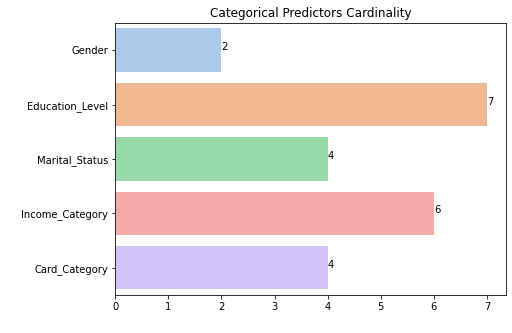

In [40]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=cat_stat['unique'], y=cat_stat['feature'], orient='h')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_title('Categorical Predictors Cardinality', fontsize=12)
# add value labels
for j,v in enumerate(cat_stat['unique']):
    ax.text(v,j,str(v))
plt.show()

There's no problem in cardinality, as each features has relatively few unique value counts. Too much unique values on categorical features would cause problems in one-hot encoding, as we could end up having too many features. 

#### 3.4.2.3. Distribution

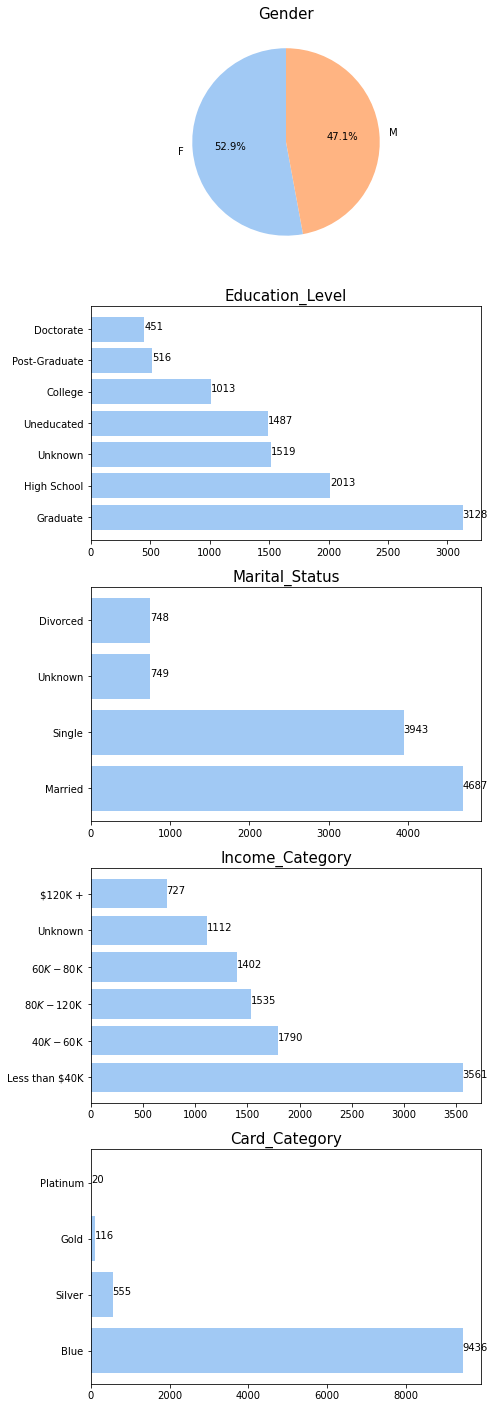

In [41]:
# prepare the figure and axes
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(7,25))  #each axes size=7x5

i=0  # initialize i for iteration

# iterate plotting
for col in cat_pred:
    catcount = df[col].value_counts()
    catlabel = df[col].value_counts().index
    
    # for more than two unique values
    if len(df[col].value_counts()) > 2:
        # bar plot
        catcount = df[col].value_counts()
        catlabel = df[col].value_counts().index
        ax[i].barh(catlabel, catcount)
        # add value label
        for j,v in enumerate(catcount):
            ax[i].text(v,j,str(v))
            continue
        ax[i].set_title(col, fontsize=15)
    
    # for less than 2 unique values
    else:
        #pie plot
        ax[i].pie(catcount, labels=catlabel, autopct='%1.1f%%', startangle=90)
        ax[i].set_title(col, fontsize=15)
        
    i=i+1

The count of 'Platinum' and 'Silver' *Card_Category* are too small compared to other category. We could either delete, or merge it with another category.

#### 3.4.2.4. Categorical-Target Relationship

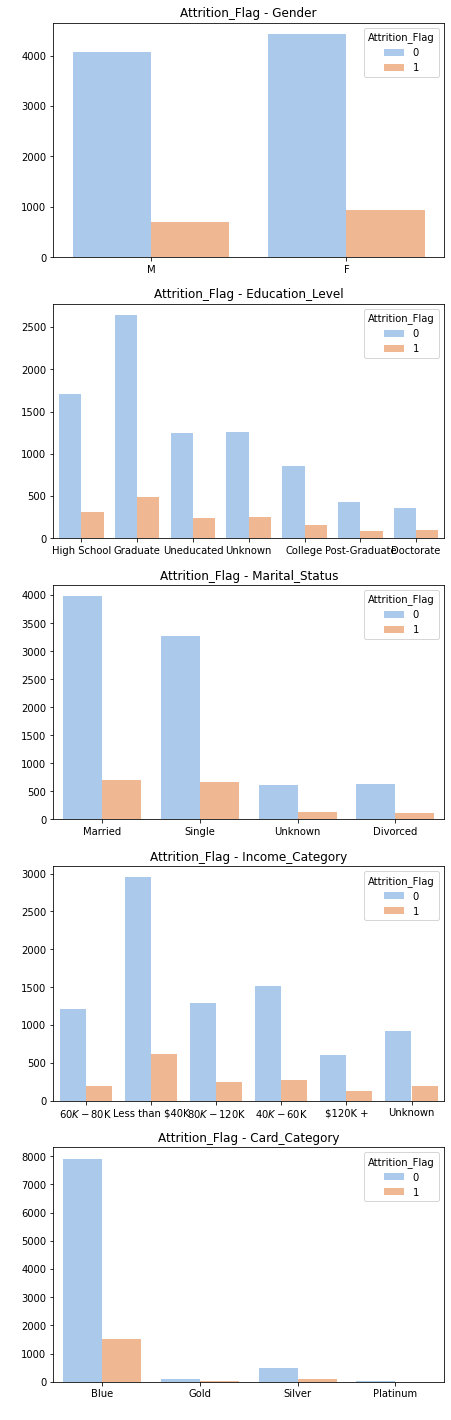

In [42]:

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(7,25))  #each axes size=7x5

i=0

for col in cat_pred:
    sns.countplot(x=df[col], hue=df['Attrition_Flag'], fill=True, alpha=1, ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    #ax[i].xaxis.set_ticks_params(labelsize=14)
    #ax[i].ticks_params(left=False, labelleft=False)
    #ax[i].set_ylabel(col, fontsize=16)
    #ax[i].bar_label(ax[i].containers[0], size='12')
    ax[i].set_title('Attrition_Flag - {}'.format(col), fontsize=12)
    # add value label
    #for j,v in enumerate(?):
    #    ax[i].text(v,j,str(v))
    #    continue
    i=i+1

plt.show()

# Stage 4 - Data Preprocessing

In [45]:
# copy df to a new variable that will be processed
data = df

## 4.1. Numerical Data Handling

### 4.1.1. Outlier Removal
Outlier should be removed to clean our data. Previously, we have calculate the percentage of removed rows using two outlier methods:


In [46]:
print('Inner Fence, rows removed: {}%'.format(round(removed_if, 2)))
print('Outer Fence, rows removed: {}%'.format(round(removed_of, 2)))

Inner Fence, rows removed: 32.84%
Outer Fence, rows removed: 8.77%


Removing too much rows would make our data not representative of the actual dataset. Normally, it should only be around 5% to 10%. Therefore, we will use the Outer Fence method to find and remove the outliers as it only remove 8.77% or the rows.

In [47]:
# recall the outliers summary of Outer Fence method
outlier_df_of

,feature,outlier_count_of,unique_outlier_count_of
0,Customer_Age,0,0
1,Dependent_count,0,0
2,Months_on_book,0,0
3,Total_Relationship_Count,0,0
4,Months_Inactive_12_mon,0,0
5,Contacts_Count_12_mon,0,0
6,Credit_Limit,0,0
7,Total_Revolving_Bal,0,0
8,Avg_Open_To_Buy,0,0
9,Total_Amt_Chng_Q4_Q1,90,83


In [48]:
# Remove outliers based on outer fence boundary
for col in num_pred:
    stats = data[col].describe()
    q1, q3 = stats['25%'], stats['75%']
    iqr = q3-q1
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)
    
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Check updated dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 5 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9240 non-null   int64  
 1   Customer_Age              9240 non-null   int64  
 2   Gender                    9240 non-null   object 
 3   Dependent_count           9240 non-null   int64  
 4   Education_Level           9240 non-null   object 
 5   Marital_Status            9240 non-null   object 
 6   Income_Category           9240 non-null   object 
 7   Card_Category             9240 non-null   object 
 8   Months_on_book            9240 non-null   int64  
 9   Total_Relationship_Count  9240 non-null   int64  
 10  Months_Inactive_12_mon    9240 non-null   int64  
 11  Contacts_Count_12_mon     9240 non-null   int64  
 12  Credit_Limit              9240 non-null   float64
 13  Total_Revolving_Bal       9240 non-null   int64  
 14  Avg_Ope

In [49]:
# updated dataframe
data.shape

(9240, 20)


### 4.1.2. Remove Highly Correlated Predictors
For two predictor features that are highly correlated, we just need one of them to be used on model as they are assumed to have  similar predictive power. Let's recalculate their correlation:

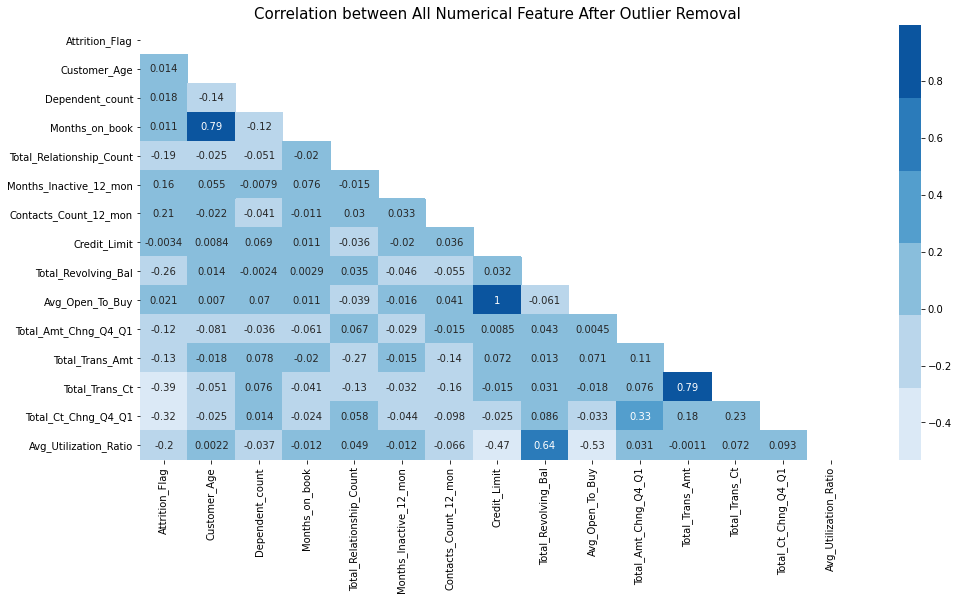

In [50]:
### recalculate correlation after outlier removal
# prepare figure
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Feature After Outlier Removal', size=15)

# create mask to cover the upper triangle of the heatmap
mask = np.triu(np.ones_like(data.corr()))
# create colormap
colormap = sns.color_palette("Blues")
# plot heatmap
sns.heatmap(data.corr(), annot=True, cmap=colormap, mask=mask)


plt.show()


*Avg_Open_To_Buy* and *Credit_Limit* are highly correlated (1). It means that an increase on one would increase the other, so we only need one of them and we can safely drop the other. We choose to drop one features that have higher correlation to target variabel *Attrition_Flag*, that is **Avg_Open_To_Buy** (0.021 vs -0.0034)


In [51]:
# drop one of the highly correlated feature
dropped = ['Avg_Open_To_Buy']
data = data.drop(dropped, axis=1)

# updated DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 5 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9240 non-null   int64  
 1   Customer_Age              9240 non-null   int64  
 2   Gender                    9240 non-null   object 
 3   Dependent_count           9240 non-null   int64  
 4   Education_Level           9240 non-null   object 
 5   Marital_Status            9240 non-null   object 
 6   Income_Category           9240 non-null   object 
 7   Card_Category             9240 non-null   object 
 8   Months_on_book            9240 non-null   int64  
 9   Total_Relationship_Count  9240 non-null   int64  
 10  Months_Inactive_12_mon    9240 non-null   int64  
 11  Contacts_Count_12_mon     9240 non-null   int64  
 12  Credit_Limit              9240 non-null   float64
 13  Total_Revolving_Bal       9240 non-null   int64  
 14  Total_A

In [52]:
# redefine numerical predictors list by removing dropped features
### 1st way
#num_pred_process = num_pred
#for i in dropped:
#    num_pred_process.remove(i)
### 2nd way    
num_pred_process = [x for x in num_pred if x not in dropped]

print(*num_pred_process, sep='\n')
print('\nCount:', len(num_pred_process))

Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio

Count: 13


### 4.1.3. Scaling
The technique used to scale numerical data depends on the type of its distribution.

In [53]:
# check skewness of updated dataframe
skew_upd = []
for col in num_pred_process:
    skew_upd.append(round(data[col].skew(),3))

num_dist_upd = pd.DataFrame({'feature':num_pred_process, 'skewness':skew_upd})
num_dist_upd

,feature,skewness
0,Customer_Age,-0.026
1,Dependent_count,-0.034
2,Months_on_book,-0.090
3,Total_Relationship_Count,-0.231
4,Months_Inactive_12_mon,0.623
5,Contacts_Count_12_mon,-0.010
6,Credit_Limit,1.770
7,Total_Revolving_Bal,-0.112
8,Total_Amt_Chng_Q4_Q1,0.571
9,Total_Trans_Amt,0.941


Features that have skewness between -0.05 and 0.05 are assumed to have gaussian distribution, which are:

In [54]:
std_pred = list(num_dist.query('skewness < 0.05 & skewness > -0.05')['feature'])
std_pred

['Customer_Age', 'Dependent_count', 'Contacts_Count_12_mon']

In [55]:
# import required libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### 4.1.3.1. Standardization
Standardization is used to scale features that are assumed to have gaussian distribution (skewness between -0.05 and 0.05), which are:

In [56]:
# feature to be standardized
std_pred

['Customer_Age', 'Dependent_count', 'Contacts_Count_12_mon']

In [57]:
# scaler
std_scaler = StandardScaler()
std_scaler.fit(data[std_pred])
data[std_pred] = std_scaler.transform(data[std_pred])

In [58]:
data[std_pred].describe()

,Customer_Age,Dependent_count,Contacts_Count_12_mon
count,9.240000e+03,9.240000e+03,9.240000e+03
mean,-2.691450e-16,-4.921508e-17,1.291896e-16
std,1.000054e+00,1.000054e+00,1.000054e+00
min,-2.560983e+00,-1.812915e+00,-2.221761e+00
25%,-6.796042e-01,-1.042349e+00,-4.267126e-01
50%,-5.247772e-02,-2.717829e-01,4.708118e-01
75%,7.000740e-01,4.987830e-01,4.708118e-01
max,2.957729e+00,2.039915e+00,3.163385e+00


#### 4.1.3.2. Normalization
If the data doesn't have a gaussian distribution, use Normalization

In [59]:
# define features to be normalized
mm_pred = num_pred_process
for i in std_pred:
    mm_pred.remove(i)
mm_pred

['Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [60]:
# scaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(data[mm_pred])
data[mm_pred] = mm_scaler.transform(data[mm_pred])

In [61]:
data[mm_pred].describe()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.534954,0.584286,0.392298,0.204386,0.453621,0.484147,0.259568,0.461655,0.450512,0.281828
std,0.185191,0.304279,0.168777,0.266254,0.325515,0.126660,0.152118,0.179118,0.134683,0.280618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.441860,0.400000,0.333333,0.031130,0.000000,0.403372,0.133129,0.303571,0.367638,0.000000
50%,0.534884,0.600000,0.333333,0.085154,0.497815,0.473411,0.270682,0.491071,0.447896,0.184184
75%,0.627907,0.800000,0.500000,0.263008,0.701629,0.554475,0.338780,0.607143,0.526861,0.520521
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.2. Categorical Data Handling
ML models cannot understand categorical data type, thus we need to encode the categorical value into numerical.

### 4.2.1. Label Encoding
Ordinal and binary data are encoded with Label Encoding, which encodes their value into a range of integer starting from 0.
<br> Note that on *Card_Category*, the count for 'Platinum' and 'Gold' are relatively small. Thus, we shall merge them with *Card_Category* 'Silver'

| Column Name | Type | Value | Encoded Value |
|---|---|---|---|
| Education_Level | Ordinal | <ul><li>Unknown</li><li>Uneducated</li><li>High School</li><li>College</li><li>Graduate</li><li>Post-Graduate</li><li>Doctorate</li></ul> | <ul><li>0</li><li>1</li><li>2</li><li>3</li><li>4</li><li>5</li><li>6</li></ul> |
| Income_Category | Ordinal | <ul><li>Unknown</li><li>Less than $40K $</li><li>$40K - $60K</li><li>$60K - $80K</li><li>$80K - $120K</li><li>$120K +$</li></ul> | <ul><li>0</li><li>1</li><li>2</li><li>3</li><li>4</li><li>5</li></ul> |
| Card_Category | Ordinal | <ul><li>Blue</li><li>Silver</li><li>Gold</li><li>Platinum</li></ul> | <ul><li>0</li><li>1</li><li>1</li><li>1</li></ul> |

In [62]:
# Encode Education_Level
data['Education_Level'] = data['Education_Level'].map({'Unknown':0,
                                                       'Uneducated':1,
                                                       'High School':2,
                                                       'College':3,
                                                       'Graduate':4,
                                                       'Post-Graduate':5,
                                                       'Doctorate':6})

In [63]:
# Encode Income_Category
data['Income_Category'] = data['Income_Category'].map({'Unknown':0,
                                                       'Less than $40K':1,
                                                       '$40K - $60K':2,
                                                       '$60K - $80K':3,
                                                       '$80K - $120K':4,
                                                       '$120K +':5})

In [64]:
# Encode Card_Category
data['Card_Category'] = data['Card_Category'].map({'Blue':0,
                                                   'Silver': 1,
                                                   'Gold':1,
                                                   'Platinum':1})

In [65]:
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,-0.303328,M,-0.271783,4,Married,2,0,0.534884,0.4,0.166667,-0.426713,0.077747,0.495431,0.892348,0.048251,0.125000,0.547573,0.311311
9,0,0.198373,M,-0.271783,4,Single,4,0,0.534884,1.0,0.500000,0.470812,0.308900,0.666269,0.988327,0.077719,0.196429,0.570874,0.144144
10,0,-0.554179,M,2.039915,1,Unknown,5,0,0.418605,0.8,0.500000,-0.426713,0.160522,0.582837,0.538911,0.057684,0.285714,0.440129,0.217217
11,0,2.330603,M,-1.042349,0,Married,2,0,0.953488,1.0,0.333333,0.470812,0.231476,0.630513,0.929313,0.067117,0.142857,0.882848,0.174174
14,0,1.327200,F,-0.271783,4,Married,1,0,0.813953,0.8,0.333333,-0.426713,0.030162,0.270163,0.771725,0.088488,0.169643,0.395469,0.279279
19,0,-0.177903,F,-0.271783,4,Married,0,0,0.558140,1.0,0.166667,-0.426713,0.393972,0.459674,0.626459,0.058185,0.098214,0.588350,0.080080
20,0,0.072948,M,-1.042349,6,Divorced,3,0,0.674419,0.8,0.333333,-2.221761,0.590751,0.715137,0.587549,0.055764,0.151786,0.601294,0.086086
21,1,1.954327,F,-1.812915,4,Married,1,0,0.837209,0.2,0.500000,0.470812,0.000000,0.000000,0.678988,0.015193,0.053571,0.388350,0.000000
23,0,0.072948,F,1.269349,0,Single,1,0,0.534884,0.4,0.500000,-0.426713,0.031855,0.619785,0.371595,0.051423,0.116071,0.228479,0.626627
24,0,0.950925,M,-0.271783,0,Married,4,0,0.674419,0.6,0.333333,0.470812,0.325860,0.000000,0.697147,0.050088,0.098214,0.485437,0.000000


### 4.2.2. One Hot Encoding
*Gender* and *Marital_Status* cannot be ordered like ordinal, thus we encode them by using One Hot Encoding using Pandas library.

In [66]:
# Encode Gender and Marital_Status
data = pd.get_dummies(data, columns=['Gender', 'Marital_Status'], drop_first=False)

In [67]:
data.head(10)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5,0,-0.303328,-0.271783,4,2,0,0.534884,0.4,0.166667,-0.426713,0.077747,0.495431,0.892348,0.048251,0.125000,0.547573,0.311311,0,1,0,1,0,0
9,0,0.198373,-0.271783,4,4,0,0.534884,1.0,0.500000,0.470812,0.308900,0.666269,0.988327,0.077719,0.196429,0.570874,0.144144,0,1,0,0,1,0
10,0,-0.554179,2.039915,1,5,0,0.418605,0.8,0.500000,-0.426713,0.160522,0.582837,0.538911,0.057684,0.285714,0.440129,0.217217,0,1,0,0,0,1
11,0,2.330603,-1.042349,0,2,0,0.953488,1.0,0.333333,0.470812,0.231476,0.630513,0.929313,0.067117,0.142857,0.882848,0.174174,0,1,0,1,0,0
14,0,1.327200,-0.271783,4,1,0,0.813953,0.8,0.333333,-0.426713,0.030162,0.270163,0.771725,0.088488,0.169643,0.395469,0.279279,1,0,0,1,0,0
19,0,-0.177903,-0.271783,4,0,0,0.558140,1.0,0.166667,-0.426713,0.393972,0.459674,0.626459,0.058185,0.098214,0.588350,0.080080,1,0,0,1,0,0
20,0,0.072948,-1.042349,6,3,0,0.674419,0.8,0.333333,-2.221761,0.590751,0.715137,0.587549,0.055764,0.151786,0.601294,0.086086,0,1,1,0,0,0
21,1,1.954327,-1.812915,4,1,0,0.837209,0.2,0.500000,0.470812,0.000000,0.000000,0.678988,0.015193,0.053571,0.388350,0.000000,1,0,0,1,0,0
23,0,0.072948,1.269349,0,1,0,0.534884,0.4,0.500000,-0.426713,0.031855,0.619785,0.371595,0.051423,0.116071,0.228479,0.626627,1,0,0,0,1,0
24,0,0.950925,-0.271783,0,4,0,0.674419,0.6,0.333333,0.470812,0.325860,0.000000,0.697147,0.050088,0.098214,0.485437,0.000000,0,1,0,1,0,0


## 4.3. Train-Test Split
Now, let's take a look at the updated features of our dataset. At this point we can split the dataset into predictors (input) and target (output) to be used on the next stages.

In [68]:
#define X (predictors) and y (target)
_X = data.drop('Attrition_Flag', axis=1)  # input variables
_y = data.Attrition_Flag                  # output variable

# all features
feature_all = _X.columns
print(*feature_all, sep='\n')
print('\nFeature Count:', len(feature_all))

Customer_Age
Dependent_count
Education_Level
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Gender_F
Gender_M
Marital_Status_Divorced
Marital_Status_Married
Marital_Status_Single
Marital_Status_Unknown

Feature Count: 22


For the purpose of model evaluation, we shall split the dataset into Train and Test set.

In [69]:
# import required library
from sklearn.model_selection import train_test_split

In [70]:
# split train and test 
_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.25, random_state=0, stratify=_y)
print('Train set shape:', _X_train.shape)
print('Test set shape:', _X_test.shape)
print('')
print('Proportional class distribution in train data:\n'+ str(_y_train.value_counts() / _y_train.count()), '\n')
print('Proportional class distribution in test data:\n'+ str(_y_test.value_counts() / _y_test.count()))

Train set shape: (6930, 22)
Test set shape: (2310, 22)

Proportional class distribution in train data:
0    0.824242
1    0.175758
Name: Attrition_Flag, dtype: float64 

Proportional class distribution in test data:
0    0.824242
1    0.175758
Name: Attrition_Flag, dtype: float64


## 4.4. Feature Selection
Feature selection is used to avoid complexity in our models. We can use only relevant features, or features that would provide optimal result. We have already done Correlation Statistics technique where we dropped one of two features that are having high correlation. 

Another technique in Feature Selection is by using algorithm. In this stage, we will select the optimal features by using LASSO regression.

In [71]:
# import required libaries
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

### 4.4.1. Find the Features

**1st Iteration**

In [72]:
# define the model
select_1 = SelectFromModel(Lasso(alpha=0.008, random_state=0))

#train the model
select_1.fit(_X_train, _y_train)

# get support from the model
print('FEATURE COUNT:',select_1.get_support().sum())
print('')
# selected feature
feature_lasso_1 = _X_train.columns[(select_1.get_support())]
print('SELECTED FEATURES:')
print(*feature_lasso_1, sep='\n')


FEATURE COUNT: 9

SELECTED FEATURES:
Dependent_count
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Total_Revolving_Bal
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Gender_F
Marital_Status_Married


**2nd iteration**

In [73]:
# define the model
select_2 = SelectFromModel(Lasso(alpha=0.004, random_state=0))

#train the model
select_2.fit(_X_train, _y_train)

# get support from the model
print('FEATURE COUNT:',select_2.get_support().sum())
print('')
# selected feature
feature_lasso_2 = _X_train.columns[(select_2.get_support())]
print('SELECTED FEATURES:')
print(*feature_lasso_2, sep='\n')

FEATURE COUNT: 10

SELECTED FEATURES:
Dependent_count
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Total_Revolving_Bal
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Gender_F
Marital_Status_Married


**3rd Iteration**

In [74]:
# define the model
select_3 = SelectFromModel(Lasso(alpha=0.002, random_state=0))

#train the model
select_3.fit(_X_train, _y_train)

# get support from the model
print('FEATURE COUNT:',select_3.get_support().sum())
print('')

# selected feature
feature_lasso_3 = _X_train.columns[(select_3.get_support())]
print('SELECTED FEATURES:')
print(*feature_lasso_3, sep='\n')

FEATURE COUNT: 11

SELECTED FEATURES:
Dependent_count
Income_Category
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Total_Revolving_Bal
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Gender_F
Marital_Status_Married


### 4.4.2. Try the Features on a Model
We shall compare the model with all features, and the model with selected features. Let's define a function to calculate the score of a Logistic Regression model from our _X and _y:

In [75]:
def log_reg_scores(name, feat):
    # modelling
    model = LogisticRegression(solver='liblinear', random_state=0)
    result = model.fit(_X_train[feat], _y_train)

    # prediction
    predicted = result.predict(_X_test[feat])
    predicted_proba = result.predict_proba(_X_test[feat])
    predicted_proba = [i[1] for i in predicted_proba]

    # evaluation
    accuracy = accuracy_score(y_true=_y_test, y_pred=predicted)
    fscore = f1_score(y_true=_y_test, y_pred=predicted)
    aucscore = roc_auc_score(y_true=_y_test, y_score=predicted_proba)

    #print
    print("Logistic Regression Accuracy ({}):".format(name), accuracy)
    print("Logistic Regression F-Score ({}):".format(name), fscore)
    print("Logistic Regression AUC ({}):".format(name), aucscore)    

In [76]:
# model with all features
log_reg_scores(name='all', feat=feature_all)

Logistic Regression Accuracy (all): 0.896969696969697
Logistic Regression F-Score (all): 0.6510263929618768
Logistic Regression AUC (all): 0.914652067723641


In [77]:
# model with lasso 1st iteration
log_reg_scores(name='1st lasso', feat=feature_lasso_1)

Logistic Regression Accuracy (1st lasso): 0.8848484848484849
Logistic Regression F-Score (1st lasso): 0.5920245398773005
Logistic Regression AUC (1st lasso): 0.869138603717349


In [78]:
# model with lasso 2nd iteration
log_reg_scores(name='2nd lasso', feat=feature_lasso_2)

Logistic Regression Accuracy (2nd lasso): 0.8982683982683982
Logistic Regression F-Score (2nd lasso): 0.656934306569343
Logistic Regression AUC (2nd lasso): 0.9154476445750714


In [79]:
# model with lasso 3rd iteration
log_reg_scores(name='3rd lasso', feat=feature_lasso_3)

Logistic Regression Accuracy (3rd lasso): 0.8982683982683982
Logistic Regression F-Score (3rd lasso): 0.6559297218155197
Logistic Regression AUC (3rd lasso): 0.9153907252556195


### 4.4.3. Conclusion
* The model with features selected by 1st iteration (alpha=0.008) has lower scores compared to the model with all features
* The model with features selected by 2nd iteration (alpha=0.004) has almost similar, even slightly higher scores compared to the model with all features
* The model with features selected by 3rd iteration (alpha=0.002) has almost similar scores compared to the model with 2nd iteration features, but the 3rd iteration has more features (13) compared to the 2nd iteration (10)

Thus, we will use the features selected by the 2nd iteration, as it produces similar result but with less than a half of the original features. 

In [80]:
# redefine input and output variables
X = _X[feature_lasso_2]
X_train = _X_train[feature_lasso_2]
y_train = _y_train
X_test = _X_test[feature_lasso_2]
y_test = _y_test

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6930 entries, 8749 to 904
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dependent_count           6930 non-null   float64
 1   Total_Relationship_Count  6930 non-null   float64
 2   Months_Inactive_12_mon    6930 non-null   float64
 3   Contacts_Count_12_mon     6930 non-null   float64
 4   Total_Revolving_Bal       6930 non-null   float64
 5   Total_Trans_Amt           6930 non-null   float64
 6   Total_Trans_Ct            6930 non-null   float64
 7   Total_Ct_Chng_Q4_Q1       6930 non-null   float64
 8   Gender_F                  6930 non-null   uint8  
 9   Marital_Status_Married    6930 non-null   uint8  
dtypes: float64(8), uint8(2)
memory usage: 500.8 KB


# Stage 5 - Modelling
We have all the features we need, now let's move on to the last stage, developing the model. We will use visualization to display the confusion matrix and ROC curve.

In [82]:
# import required library
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [83]:
### define functions to display visualization

# confusion matrix visualization
def confusion_matrix_heatmap(conf_mat):
    conf_mat_prop = conf_mat / conf_mat.sum()
    conf_mat_prop = pd.DataFrame(conf_mat_prop)
    
    plt.figure(figsize=(7,5))
    _ = sns.heatmap(conf_mat_prop, annot = True, cmap = "Blues", vmin = 0, vmax = 1)
    _.set_title("Proportional Confusion Matrix")
    _.set(xlabel = "Predicted Value", ylabel = "Actual Value")
    
    return plt.show()

# AUC visualization
def auc_visualization(y_test_fold, predicted_proba):
    # Create no-skill model
    ns_proba = [0 for _ in range(len(y_test_fold))]
    ns_fpr, ns_tpr, _ = roc_curve(y_true = y_test_fold, y_score = ns_proba)

    model_fpr, model_tpr, _ = roc_curve(y_true = y_test_fold, y_score = predicted_proba)
    
    plt.figure(figsize=(7,5))
    _ = plt.plot(ns_fpr, ns_tpr, linestyle = "--", label = "No-skill model")
    _ = plt.plot(model_fpr, model_tpr, marker = ".", label = "Best model")
    _ = plt.title("Receiver Operating Characteristic Curve")
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.legend()
    
    return plt.show()

## 5.1. Logistic Regression

### 5.1.1. Modelling and Evaluation

Logistic Regression Confusion Matrix:
[[1850   54]
 [ 181  225]]





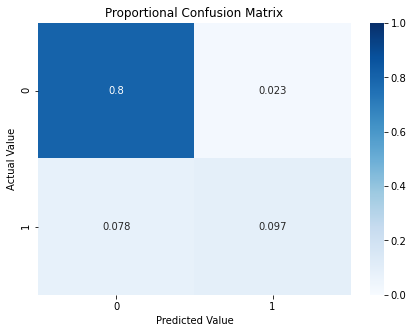




Logistic Regression Accuracy: 0.898
Logistic Regression F-Score: 0.657
Logistic Regression AUC: 0.915





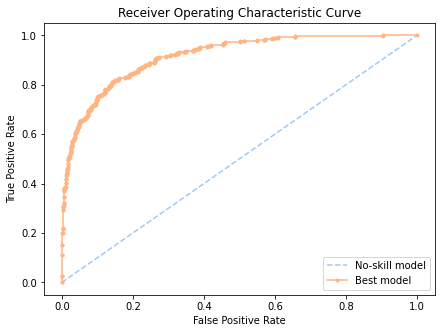

In [84]:
# define the model
lg_model = LogisticRegression(solver='liblinear', random_state=0)

# train the model
lg_result = lg_model.fit(X_train, y_train)

# prediction
lg_predicted = lg_result.predict(X_test)
lg_predicted_proba = lg_result.predict_proba(X_test)
lg_predicted_proba = [i[1] for i in lg_predicted_proba]

# confusion matrix
lg_conf_mat = confusion_matrix(y_true = y_test, y_pred = lg_predicted)
print("Logistic Regression Confusion Matrix:")
print(lg_conf_mat)
print('\n\n')
# display confusion matrix heatmap
confusion_matrix_heatmap(lg_conf_mat)

print('\n\n')

# Evaluation
lg_accuracy = accuracy_score(y_true = y_test, y_pred = lg_predicted)
lg_fscore = f1_score(y_true = y_test, y_pred = lg_predicted)
lg_roc_auc = roc_auc_score(y_true = y_test, y_score = lg_predicted_proba)
print("Logistic Regression Accuracy:", round(lg_accuracy,3))
print("Logistic Regression F-Score:", round(lg_fscore, 3))
print("Logistic Regression AUC:", round(lg_roc_auc, 3))
print('\n\n')
# display ROC curve
auc_visualization(y_test, lg_predicted_proba)


### 5.1.2. Hyperparameter Tuning

#### 1st iteration

In [85]:
# specify parameters
lg_param_grid_1 = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                   'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   }

# search algorithm
lg_search_1 = GridSearchCV(lg_model,
                           lg_param_grid_1,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

# train
lg_tune_result_1 = lg_search_1.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/anaconda3/envs/ocr-new/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda3/envs/ocr-new/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda3/envs/ocr-new/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/anaconda3/envs/ocr-new/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _

In [86]:
# best hyperparameter
print('Best hyperparameter:', lg_tune_result_1.best_params_)

Best hyperparameter: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


#### 2nd Iteration

In [87]:
# specify parameters
lg_param_grid_2 = {'solver': ['saga'],
                   'penalty': ['l1'],
                   'C': [30, 40, 60, 80, 100, 120, 130],
                   }

# search algorithm
lg_search_2 = GridSearchCV(lg_model,
                           lg_param_grid_2,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

# train
lg_tune_result_2 = lg_search_2.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [88]:
# best hyperparameter
print('Best hyperparameter:', lg_tune_result_2.best_params_)

Best hyperparameter: {'C': 30, 'penalty': 'l1', 'solver': 'saga'}


#### 3rd iteration


In [89]:
# specify parameters
lg_param_grid_3 = {'solver': ['saga'],
                   'penalty': ['l1'],
                   'C': [15, 20, 25, 30, 35],
                   }
# search algorithm
lg_search_3 = GridSearchCV(lg_model,
                           lg_param_grid_3,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

# train
lg_tune_result_3 = lg_search_3.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [90]:
# best hyperparameter
print('Best hyperparameter:', lg_tune_result_3.best_params_)

Best hyperparameter: {'C': 30, 'penalty': 'l1', 'solver': 'saga'}


#### 4th Iteration

In [91]:
# specify parameters
lg_param_grid_4 = {'solver': ['saga'],
                   'penalty': ['l1'],
                   'C': [26,27,28,29,30,31,32,33,34],
                   }
# search algorithm
lg_search_4 = GridSearchCV(lg_model,
                           lg_param_grid_4,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

# train
lg_tune_result_4 = lg_search_4.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [92]:
# best hyperparameter
print('Best hyperparameter:', lg_tune_result_4.best_params_)

Best hyperparameter: {'C': 30, 'penalty': 'l1', 'solver': 'saga'}


#### Compare Score

In [93]:
print('Best score 1st:', lg_tune_result_1.best_score_)
print('Best score 2nd:', lg_tune_result_2.best_score_)
print('Best score 3rd:', lg_tune_result_3.best_score_)
print('Best score 4th:', lg_tune_result_4.best_score_)

Best score 1st: 0.9367578250498519
Best score 2nd: 0.9367707912420563
Best score 3rd: 0.9367707912420563
Best score 4th: 0.9367707912420563


#### Conclusion

After four iteration, the hyperparameter 'C':30  didn't change since the 2nd iteration. We decided to stop the iteration, and use best hyperparameter as found by the 4th iteration.

### 5.1.3. Model Comparison After Tuning

#### New Model

New Logistic Regression Confusion Matrix:
[[1834   70]
 [ 159  247]]





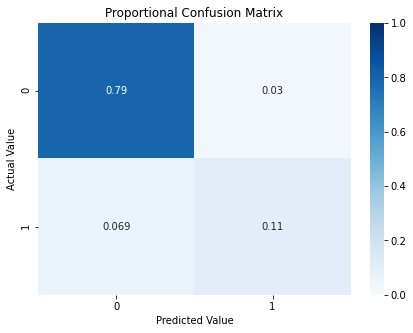




New Logistic Regression Accuracy: 0.9009
New Logistic Regression F-Score: 0.6833
New Logistic Regression AUC: 0.9215





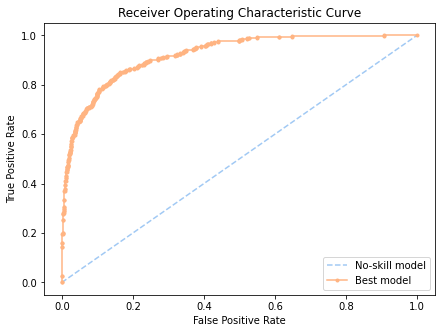

In [94]:
# define the model
new_lg_model = LogisticRegression(random_state=0,
                                  **lg_tune_result_4.best_params_)

# train the model
new_lg_result = new_lg_model.fit(X_train, y_train)

# prediction
new_lg_predicted = new_lg_result.predict(X_test)
new_lg_predicted_proba = new_lg_result.predict_proba(X_test)
new_lg_predicted_proba = [i[1] for i in new_lg_predicted_proba]

# confusion matrix
new_lg_conf_mat = confusion_matrix(y_true = y_test, y_pred = new_lg_predicted)
print("New Logistic Regression Confusion Matrix:")
print(new_lg_conf_mat)
print('\n\n')
# display confusion matrix heatmap
confusion_matrix_heatmap(new_lg_conf_mat)

print('\n\n')

# Evaluation
new_lg_accuracy = accuracy_score(y_true = y_test, y_pred = new_lg_predicted)
new_lg_fscore = f1_score(y_true = y_test, y_pred = new_lg_predicted)
new_lg_roc_auc = roc_auc_score(y_true = y_test, y_score = new_lg_predicted_proba)
print("New Logistic Regression Accuracy:", round(new_lg_accuracy,4))
print("New Logistic Regression F-Score:", round(new_lg_fscore, 4))
print("New Logistic Regression AUC:", round(new_lg_roc_auc, 4))
print('\n\n')
# display ROC curve
auc_visualization(y_test, new_lg_predicted_proba)


#### Score Comparison

In [95]:
# comparison
print("Logistic Regression Accuracy:", round(lg_accuracy,4))
print("Logistic Regression F-Score:", round(lg_fscore, 4))
print("Logistic Regression AUC:", round(lg_roc_auc, 4))
print('===')
print("New Logistic Regression Accuracy:", round(new_lg_accuracy,4))
print("New Logistic Regression F-Score:", round(new_lg_fscore, 4))
print("New Logistic Regression AUC:", round(new_lg_roc_auc, 4))

Logistic Regression Accuracy: 0.8983
Logistic Regression F-Score: 0.6569
Logistic Regression AUC: 0.9154
===
New Logistic Regression Accuracy: 0.9009
New Logistic Regression F-Score: 0.6833
New Logistic Regression AUC: 0.9215


## 5.2. k-NN

In [96]:
# import required libraries
from sklearn.neighbors import KNeighborsClassifier

### 5.2.1. Modelling and Evaluation

k-NN Confusion Matrix:
[[1851   53]
 [ 242  164]]





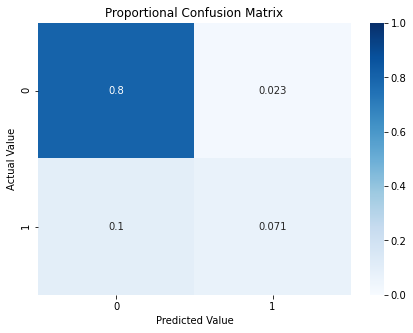




k-NN Accuracy: 0.872
k-NN F-Score: 0.526
k-NN AUC: 0.835





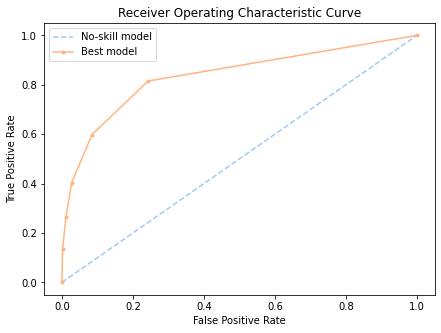

In [97]:
# define the model
knn_model = KNeighborsClassifier()

# train the model
knn_result = knn_model.fit(X_train, y_train)

# prediction
knn_predicted = knn_result.predict(X_test)
knn_predicted_proba = knn_result.predict_proba(X_test)
knn_predicted_proba = [i[1] for i in knn_predicted_proba]

# confusion matrix
knn_conf_mat = confusion_matrix(y_true = y_test, y_pred = knn_predicted)
print("k-NN Confusion Matrix:")
print(knn_conf_mat)
print('\n\n')
# display confusion matrix heatmap
confusion_matrix_heatmap(knn_conf_mat)

print('\n\n')

# Evaluation
knn_accuracy = accuracy_score(y_true = y_test, y_pred = knn_predicted)
knn_fscore = f1_score(y_true = y_test, y_pred = knn_predicted)
knn_roc_auc = roc_auc_score(y_true = y_test, y_score = knn_predicted_proba)
print("k-NN Accuracy:", round(knn_accuracy,3))
print("k-NN F-Score:", round(knn_fscore, 3))
print("k-NN AUC:", round(knn_roc_auc, 3))
print('\n\n')
# display ROC curve
auc_visualization(y_test, knn_predicted_proba)


### 5.2.2. Hyperparameter Tuning

#### 1st Iteration

In [98]:
# specify parameters
knn_param_grid_1 = {'n_neighbors': list(range(1,22,2)),
                    'metric': ['euclidean', 'manhattan', 'minkowski'],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    }

# search algorithm
knn_search_1 = GridSearchCV(knn_model,
                           knn_param_grid_1,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

# train
knn_tune_result_1 = knn_search_1.fit(X_train, y_train)

Fitting 10 folds for each of 264 candidates, totalling 2640 fits


In [99]:
# best hyperparameter
print('Best hyperparameter:', knn_tune_result_1.best_params_)

Best hyperparameter: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}


#### 2nd Iteration

In [100]:
# specify parameters
knn_param_grid_2 = {'n_neighbors': list(range(21,50,2)),
                    'metric': ['manhattan'],
                    'weights': ['distance'],
                    'algorithm': ['auto'],
                    }

# search algorithm
knn_search_2 = GridSearchCV(knn_model,
                           knn_param_grid_2,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

# train
knn_tune_result_2 = knn_search_2.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [101]:
# best hyperparameter
print('Best hyperparameter:', knn_tune_result_2.best_params_)

Best hyperparameter: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 45, 'weights': 'distance'}


#### 3rd Iteration

In [102]:
# specify parameters
knn_param_grid_3 = {'n_neighbors': [45,47,49,51,52,53],
                    'metric': ['manhattan'],
                    'weights': ['distance'],
                    'algorithm': ['auto'],
                    }

# search algorithm
knn_search_3 = GridSearchCV(knn_model,
                           knn_param_grid_3,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose = 1)

# train
knn_tune_result_3 = knn_search_3.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [103]:
# best hyperparameter
print('Best hyperparameter:', knn_tune_result_3.best_params_)

Best hyperparameter: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 45, 'weights': 'distance'}


#### Compare Score

In [104]:
print('Best score 1st:', knn_tune_result_1.best_score_)
print('Best score 2nd:', knn_tune_result_2.best_score_)
print('Best score 3rd:', knn_tune_result_3.best_score_)

Best score 1st: 0.9207219172985989
Best score 2nd: 0.92497506482673
Best score 3rd: 0.92497506482673


#### Conclusion
use hyperparameters as found by 3rd iteration

### 5.2.3. Model Comparison After Tuning

#### New Model

New k-NN Confusion Matrix:
[[1891   13]
 [ 285  121]]





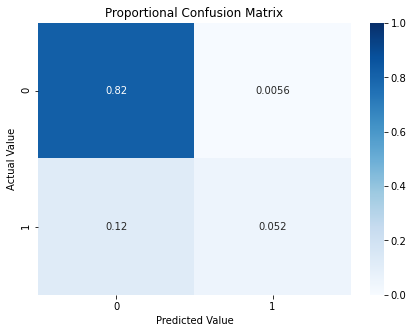




New k-NN Accuracy: 0.871
New k-NN F-Score: 0.448
New k-NN AUC: 0.907





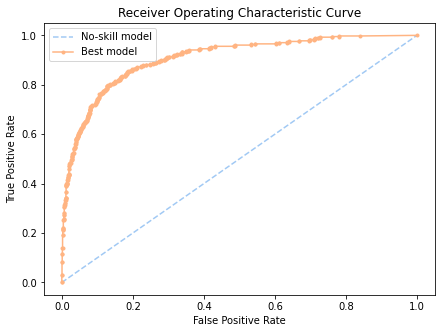

In [105]:
# define the model
new_knn_model = KNeighborsClassifier(**knn_tune_result_3.best_params_)

# train the model
new_knn_result = new_knn_model.fit(X_train, y_train)

# prediction
new_knn_predicted = new_knn_result.predict(X_test)
new_knn_predicted_proba = new_knn_result.predict_proba(X_test)
new_knn_predicted_proba = [i[1] for i in new_knn_predicted_proba]

# confusion matrix
new_knn_conf_mat = confusion_matrix(y_true = y_test, y_pred = new_knn_predicted)
print("New k-NN Confusion Matrix:")
print(new_knn_conf_mat)
print('\n\n')
# display confusion matrix heatmap
confusion_matrix_heatmap(new_knn_conf_mat)

print('\n\n')

# Evaluation
new_knn_accuracy = accuracy_score(y_true = y_test, y_pred = new_knn_predicted)
new_knn_fscore = f1_score(y_true = y_test, y_pred = new_knn_predicted)
new_knn_roc_auc = roc_auc_score(y_true = y_test, y_score = new_knn_predicted_proba)
print("New k-NN Accuracy:", round(new_knn_accuracy,3))
print("New k-NN F-Score:", round(new_knn_fscore, 3))
print("New k-NN AUC:", round(new_knn_roc_auc, 3))
print('\n\n')
# display ROC curve
auc_visualization(y_test, new_knn_predicted_proba)


#### Score Comparison

In [106]:
# comparison
print("k-NN Accuracy:", round(knn_accuracy,4))
print("k-NN F-Score:", round(knn_fscore, 4))
print("k-NN AUC:", round(knn_roc_auc, 4))
print('===')
print("New k-NN Accuracy:", round(new_knn_accuracy,4))
print("New k-NN F-Score:", round(new_knn_fscore, 4))
print("New k-NN AUC:", round(new_knn_roc_auc, 4))

k-NN Accuracy: 0.8723
k-NN F-Score: 0.5265
k-NN AUC: 0.8348
===
New k-NN Accuracy: 0.871
New k-NN F-Score: 0.4481
New k-NN AUC: 0.9073


The tuned model AUC score is higher than the default model's, but the F-Score is not. It is because the 'scoring' parameter on GridSearchCV is set to 'roc_auc' as we want to predict the probability of the churn.

## 5.3. Random Forest

In [107]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier

### 5.3.1. Modelling and Evaluation

Random Forest Confusion Matrix:
[[1866   38]
 [  59  347]]





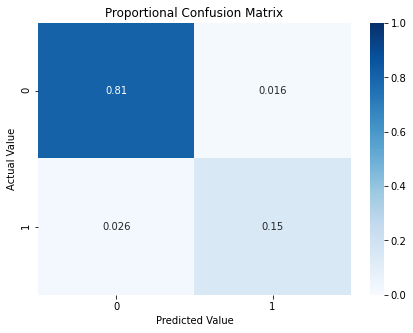




Random Forest Accuracy: 0.958
Random Forest F-Score: 0.877
Random Forest AUC: 0.983





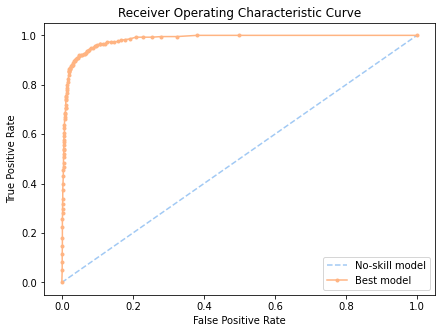

In [108]:
# define the model
rf_model = RandomForestClassifier(random_state=0)

# train the model
rf_result = rf_model.fit(X_train, y_train)

# prediction
rf_predicted = rf_result.predict(X_test)
rf_predicted_proba = rf_result.predict_proba(X_test)
rf_predicted_proba = [i[1] for i in rf_predicted_proba]

# confusion matrix
rf_conf_mat = confusion_matrix(y_true = y_test, y_pred = rf_predicted)
print("Random Forest Confusion Matrix:")
print(rf_conf_mat)
print('\n\n')
# display confusion matrix heatmap
confusion_matrix_heatmap(rf_conf_mat)

print('\n\n')

# Evaluation
rf_accuracy = accuracy_score(y_true = y_test, y_pred = rf_predicted)
rf_fscore = f1_score(y_true = y_test, y_pred = rf_predicted)
rf_roc_auc = roc_auc_score(y_true = y_test, y_score = rf_predicted_proba)
print("Random Forest Accuracy:", round(rf_accuracy,3))
print("Random Forest F-Score:", round(rf_fscore, 3))
print("Random Forest AUC:", round(rf_roc_auc, 3))
print('\n\n')
# display ROC curve
auc_visualization(y_test, rf_predicted_proba)

### 5.3.2. Hyperparameter Tuning

#### 1st Iteration

In [ ]:
# specify parameters
rf_param_grid_1 = {'n_estimators': [10,100,1000],
                   'max_depth': [5, 10, 15],
                   'min_samples_split': [2,3,4,5],
                   'min_samples_leaf': [1,2,3],
                   'max_features': ['auto','sqrt','log2']
                   }

# search algorithm
rf_search_1 = GridSearchCV(rf_model,
                           rf_param_grid_1,
                           scoring = 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# train
rf_tune_result_1 = rf_search_1.fit(X_train, y_train)

In [ ]:
# best hyperparameter
print('Best hyperparameter:', rf_tune_result_1.best_params_)

#### 2nd Iteration

In [ ]:
# specify parameters
rf_param_grid_2 = {'n_estimators': [900, 1000, 1100, 1200],
                   'max_depth': [14, 15, 16],
                   'min_samples_split': [2],
                   'min_samples_leaf': [1],
                   'max_features': ['auto']
                   }


# search algorithm
rf_search_2 = GridSearchCV(rf_model,
                           rf_param_grid_2,
                           scoring = 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# train
rf_tune_result_2 = rf_search_2.fit(X_train, y_train)

In [ ]:
# best hyperparameter
print('Best hyperparameter:', rf_tune_result_2.best_params_)

#### 3rd Iteration

In [ ]:
# specify parameters
rf_param_grid_3 = {'n_estimators': [700, 800, 900],
                   'max_depth': [15],
                   'min_samples_split': [2],
                   'min_samples_leaf': [1],
                   'max_features': ['auto']
                   }

# search algorithm
rf_search_3 = GridSearchCV(rf_model,
                           rf_param_grid_3,
                           scoring = 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# train
rf_tune_result_3 = rf_search_3.fit(X_train, y_train)

In [ ]:
# best hyperparameter
print('Best hyperparameter:', rf_tune_result_3.best_params_)

#### 4th Iteration

In [ ]:
# specify parameters
rf_param_grid_4 = {'n_estimators': [840, 860, 880, 900],
                   'max_depth': [15],
                   'min_samples_split': [2],
                   'min_samples_leaf': [1],
                   'max_features': ['auto'],
                   'criterion': ['gini','entropy']  #new hyperparameter addition
                   }

# search algorithm
rf_search_4 = GridSearchCV(rf_model,
                           rf_param_grid_4,
                           scoring = 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# train
rf_tune_result_4 = rf_search_4.fit(X_train, y_train)

In [ ]:
# best hyperparameter
print('Best hyperparameter:', rf_tune_result_4.best_params_)

#### 5th Iteration

In [ ]:
# specify parameters
rf_param_grid_5 = {'n_estimators': [890, 895,900, 905],
                   'max_depth': [15],
                   'min_samples_split': [2],
                   'min_samples_leaf': [1],
                   'max_features': ['auto'],
                   'criterion': ['entropy']
                   }

# search algorithm
rf_search_5 = GridSearchCV(rf_model,
                           rf_param_grid_5,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs=-1,
                           verbose = 1)

# train
rf_tune_result_5 = rf_search_5.fit(X_train, y_train)

In [ ]:
# best hyperparameter
print('Best hyperparameter:', rf_tune_result_5.best_params_)

#### Compare Score

In [ ]:
print('Best score 1st:', rf_tune_result_1.best_score_)
print('Best score 2nd:', rf_tune_result_2.best_score_)
print('Best score 3rd:', rf_tune_result_3.best_score_)
print('Best score 4th:', rf_tune_result_4.best_score_)
print('Best score 5th:', rf_tune_result_5.best_score_)

#### Conclusion
The hyperparameters at 4th iteration gives the best score, thus we will use it as our new model hyperparameters.

### 5.3.3. Model Comparison After Tuning

#### New Model

In [ ]:
# define the model
new_rf_model = RandomForestClassifier(random_state=0, **rf_tune_result_4.best_params_)

# train the model
new_rf_result = new_rf_model.fit(X_train, y_train)

# prediction
new_rf_predicted = new_rf_result.predict(X_test)
new_rf_predicted_proba = new_rf_result.predict_proba(X_test)
new_rf_predicted_proba = [i[1] for i in new_rf_predicted_proba]

# confusion matrix
new_rf_conf_mat = confusion_matrix(y_true = y_test, y_pred = new_rf_predicted)
print("New Random Forest Confusion Matrix:")
print(new_rf_conf_mat)
print('\n\n')
# display confusion matrix heatmap
confusion_matrix_heatmap(new_rf_conf_mat)

print('\n\n')

# Evaluation
new_rf_accuracy = accuracy_score(y_true = y_test, y_pred = new_rf_predicted)
new_rf_fscore = f1_score(y_true = y_test, y_pred = new_rf_predicted)
new_rf_roc_auc = roc_auc_score(y_true = y_test, y_score = new_rf_predicted_proba)
print("New Random Forest Accuracy:", round(new_rf_accuracy,3))
print("New Random Forest F-Score:", round(new_rf_fscore, 3))
print("New Random Forest AUC:", round(new_rf_roc_auc, 3))
print('\n\n')
# display ROC curve
auc_visualization(y_test, new_rf_predicted_proba)

#### Score Comparison

In [ ]:
# comparison
print("Random Forest Accuracy:", round(rf_accuracy,4))
print("Random Forest F-Score:", round(rf_fscore, 4))
print("Random Forest AUC:", round(rf_roc_auc, 4))
print('===')
print("New Random Forest Accuracy:", round(new_rf_accuracy,4))
print("New Random Forest F-Score:", round(new_rf_fscore, 4))
print("New Random Forest AUC:", round(new_rf_roc_auc, 4))

## 5.4. Conclusion

### Best Model
The model which has the best AUC score for our data is Random Forest, followed by Logistic Regression, and then k-NN in the last place.

In [ ]:
print("New Logistic Regression AUC:", round(new_lg_roc_auc, 4))
print("New k-NN AUC:", round(new_knn_roc_auc, 4))
print("New Random Forest AUC:", round(new_rf_roc_auc, 4))

### Feature Importance

In [ ]:
new_rf_model.feature_importances_

In [ ]:
len(X.columns)

In [ ]:
# feature importance dataframe
feat_imp = pd.DataFrame({'Feature': X.columns,
                         'Importance': new_rf_model.feature_importances_})
feat_imp_sort = feat_imp.sort_values(by='Importance', ascending=False)
feat_imp_sort

# feature importance bar plot


In [ ]:
# display as figure
plt.figure(figsize=(7,5))
sns.barplot(x=feat_imp_sort['Importance'], y=feat_imp_sort['Feature'], color='#a2c9f4')
plt.ylabel('')
plt.xlabel('Importance')
plt.title('Feature Importance', fontsize=12)
plt.show()